In [1]:
%pylab inline
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [10]:
milk = pd.read_csv('__monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk.head()

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


In [19]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
init_notebook_mode(connected = True)

def plotly_df(df, title = ''):
    data = []

    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)

    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

In [20]:
milk['daily'] = milk['milk'].div(milk.index.days_in_month)

In [23]:
milk.drop(['milk'], axis = 1, inplace = True)

In [24]:
#dataset = pd.read_csv('monthly-milk-production.csv', index_col=['month'], parse_dates=['month'])
plotly_df(milk, title = "Online users")

In [14]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(milk['milk'])

(-1.3038115874221312,
 0.62742670860303085,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [34]:
sum(milk['milk'].div(milk.index.days_in_month))

4166.326661899464

In [25]:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)

In [26]:
milk.daily_diff12 = milk.daily - milk.daily.shift(12)

D:\Program_Files\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning:

The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.



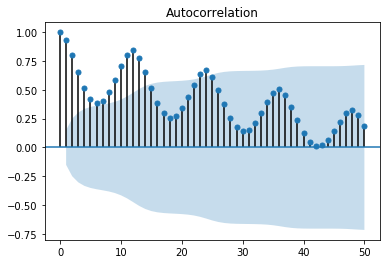

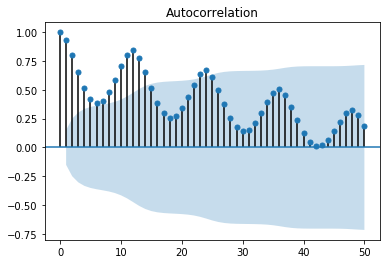

In [27]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.values.squeeze(), lags=50)

In [28]:
milk

,daily
month,
1962-01-01,19.000000
1962-02-01,20.035714
1962-03-01,20.645161
1962-04-01,21.866667
1962-05-01,23.451613
1962-06-01,23.233333
1962-07-01,20.645161
1962-08-01,19.322581
1962-09-01,18.933333
